## Backtesting with Backtesting.py

- Installing Backtesting.py

In [ ]:
pip install backtesting

## Taking a sample code from https://github.com/kernc/backtesting.py

In [1]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 9)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(GOOG, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
print(stats)
bt.plot()

C:\Python 39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Python 39\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  50718.97026
Equity Peak [$]                   51289.12026
Return [%]                         407.189703
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   20.984432
Volatility (Ann.) [%]               36.879554
Sharpe Ratio                         0.568999
Sortino Ratio                        1.068126
Calmar Ratio                         0.553233
Max. Drawdown [%]                   -37.93055
Avg. Drawdown [%]                   -5.889397
Max. Drawdown Duration      731 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                   98
Win Rate [%]                        52.040816
Best Trade [%]                       58.42177
Worst Trade [%]                    -19.778312
Avg. Trade [%]                    

C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1330', ...)

## Example 2 with Indian Share
### Download data of a stock from Yahoo Finance

In [24]:
import yfinance as yf
data = yf.download('TataMotors.NS', start='2020-01-01', end='2024-10-15')


[*********************100%%**********************]  1 of 1 completed


In [25]:
data.columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']


### Backtesting using SMA Crossover strategy

In [26]:
from backtesting import Strategy
from backtesting.lib import crossover

class SmaCross(Strategy):
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, 10)
        self.sma2 = self.I(SMA, self.data.Close, 20)
    
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


### Run the backtest

In [27]:
from backtesting import Backtest

bt = Backtest(data, SmaCross, cash=10000, commission=.002)
result = bt.run()


In [28]:
print(result)


Start                     2020-01-01 00:00:00
End                       2024-10-14 00:00:00
Duration                   1748 days 00:00:00
Exposure Time [%]                   93.839662
Equity Final [$]                   119454.188
Equity Peak [$]                 147629.134899
Return [%]                         1094.54188
Buy & Hold Return [%]              406.379223
Return (Ann.) [%]                    69.46333
Volatility (Ann.) [%]               68.598776
Sharpe Ratio                         1.012603
Sortino Ratio                        2.978735
Calmar Ratio                          2.33556
Max. Drawdown [%]                  -29.741622
Avg. Drawdown [%]                   -5.751845
Max. Drawdown Duration      544 days 00:00:00
Avg. Drawdown Duration       32 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     1102.72276
Worst Trade [%]                    1102.72276
Avg. Trade [%]                    

### Plot the results

In [29]:
bt.plot()


C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p3513', ...)

### Optimize the strategy

In [30]:
from backtesting import Strategy
from backtesting.lib import crossover

# Define the SmaCross strategy
class SmaCross(Strategy):
    # Define class variables for the SMA periods
    sma1 = 10  # default value for the short-period SMA
    sma2 = 20  # default value for the long-period SMA

    def init(self):
        # Initialize moving averages
        self.sma1_series = self.I(SMA, self.data.Close, self.sma1)
        self.sma2_series = self.I(SMA, self.data.Close, self.sma2)
    
    def next(self):
        # Buy if the short-term SMA crosses above the long-term SMA
        if crossover(self.sma1_series, self.sma2_series):
            self.buy()
        # Sell if the short-term SMA crosses below the long-term SMA
        elif crossover(self.sma2_series, self.sma1_series):
            self.sell()


In [31]:
from backtesting import Backtest

# Create a Backtest instance
bt = Backtest(data, SmaCross, cash=10000, commission=.002)

# Run the backtest with default parameters
result = bt.run()
bt.plot()
print(result)

C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2020-01-01 00:00:00
End                       2024-10-14 00:00:00
Duration                   1748 days 00:00:00
Exposure Time [%]                   93.839662
Equity Final [$]                   119454.188
Equity Peak [$]                 147629.134899
Return [%]                         1094.54188
Buy & Hold Return [%]              406.379223
Return (Ann.) [%]                    69.46333
Volatility (Ann.) [%]               68.598776
Sharpe Ratio                         1.012603
Sortino Ratio                        2.978735
Calmar Ratio                          2.33556
Max. Drawdown [%]                  -29.741622
Avg. Drawdown [%]                   -5.751845
Max. Drawdown Duration      544 days 00:00:00
Avg. Drawdown Duration       32 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     1102.72276
Worst Trade [%]                    1102.72276
Avg. Trade [%]                    

In [32]:
optimized_result = bt.optimize(
    sma1=range(5, 30, 5),  # Test SMA1 with values from 5 to 30, in steps of 5
    sma2=range(10, 60, 10),  # Test SMA2 with values from 10 to 60, in steps of 10
    maximize='Equity Final [$]'  # Optimize for the highest final equity
)
print(optimized_result)

Start                     2020-01-01 00:00:00
End                       2024-10-14 00:00:00
Duration                   1748 days 00:00:00
Exposure Time [%]                   98.649789
Equity Final [$]                169257.057993
Equity Peak [$]                 209190.053598
Return [%]                         1592.57058
Buy & Hold Return [%]              406.379223
Return (Ann.) [%]                   82.499039
Volatility (Ann.) [%]               73.543527
Sharpe Ratio                         1.121772
Sortino Ratio                        3.495528
Calmar Ratio                         2.772453
Max. Drawdown [%]                  -29.756694
Avg. Drawdown [%]                   -5.292687
Max. Drawdown Duration      544 days 00:00:00
Avg. Drawdown Duration       29 days 00:00:00
# Trades                                    4
Win Rate [%]                             75.0
Best Trade [%]                    1092.025145
Worst Trade [%]                     -0.833657
Avg. Trade [%]                    

In [33]:
bt.plot()

C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p4231', ...)

### using RSI as an indicator

In [34]:
import numpy as np

def RSI(data, period=14):
    """Calculate the Relative Strength Index (RSI) for the given data."""
    # Calculate price changes
    delta = data[1:] - data[:-1]  # Calculate differences between consecutive prices
    gain = np.where(delta > 0, delta, 0)  # Positive changes
    loss = np.where(delta < 0, -delta, 0)  # Negative changes

    # Calculate average gain and average loss
    avg_gain = np.zeros_like(data)
    avg_loss = np.zeros_like(data)

    # Initialize the first average gain/loss
    avg_gain[period] = np.mean(gain[:period])
    avg_loss[period] = np.mean(loss[:period])

    # Calculate the smoothed average gain and loss
    for i in range(period + 1, len(data)):
        avg_gain[i] = (avg_gain[i - 1] * (period - 1) + gain[i - 1]) / period
        avg_loss[i] = (avg_loss[i - 1] * (period - 1) + loss[i - 1]) / period

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [35]:
class RsiStrategy(Strategy):
    """A simple strategy that trades based on the RSI indicator."""
    
    def init(self):
        # Initialize the RSI indicator
        self.rsi = self.I(RSI, self.data.Close, 14)  # 14-period RSI

    def next(self):
        # Buy condition: RSI crosses below 30
        if self.rsi[-1] < 30 and not self.position:
            self.buy()
        # Sell condition: RSI crosses above 70
        elif self.rsi[-1] > 70 and self.position:
            self.sell()

In [36]:
bt = Backtest(data, RsiStrategy, cash=10_000, commission=0.002)
stats = bt.run()
bt.plot()

# Display the backtest statistics
print(stats)

C:\Users\Pratham Kotian\AppData\Local\Temp\ipykernel_17516\914409950.py:23: RuntimeWarning: invalid value encountered in divide
  rs = avg_gain / avg_loss
C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Python 39\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2020-01-01 00:00:00
End                       2024-10-14 00:00:00
Duration                   1748 days 00:00:00
Exposure Time [%]                   96.624473
Equity Final [$]                    63921.042
Equity Peak [$]                   79006.84034
Return [%]                          539.21042
Buy & Hold Return [%]              406.379223
Return (Ann.) [%]                   48.363405
Volatility (Ann.) [%]               65.166558
Sharpe Ratio                         0.742151
Sortino Ratio                        1.794144
Calmar Ratio                         0.865801
Max. Drawdown [%]                  -55.859722
Avg. Drawdown [%]                   -6.742156
Max. Drawdown Duration      544 days 00:00:00
Avg. Drawdown Duration       37 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     539.266612
Worst Trade [%]                    539.266612
Avg. Trade [%]                    

## Installation of required libraries

In [37]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

## Retrieve data from Yahoo Finance
symbol = "IOC.NS" ( Replace with your desired stock symbol)

In [38]:
symbol = "ICICIBANK.NS"
start_date = datetime(2021, 1, 1)
end_date = datetime(2024, 8, 20)


data = yf.download(symbol,start=start_date, end=end_date, interval="1d" )

[*********************100%%**********************]  1 of 1 completed


## Calculate moving averages

In [39]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

## Calculate RSI

In [40]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

data['RSI'] = calculate_rsi(data)

## Calculate Bollinger Bands


In [41]:
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    sma = data['Close'].rolling(window=window).mean()
    std = data['Close'].rolling(window=window).std()

    upper_band = sma + (std * num_std_dev)
    lower_band = sma - (std * num_std_dev)

    return upper_band, lower_band

data['UpperBB'], data['LowerBB'] = calculate_bollinger_bands(data)

### Signal Generation
- Buy Signals (1):
 When the 20-day Simple Moving Average (SMA) is greater than the 50-day SMA.

When the Relative Strength Index (RSI) is below 30 and the closing price is below the lower Bollinger Band.

- Sell Signals(-1):
When the 20-day SMA is less than the 50-day SMA.

When the RSI is above 70 and the closing price is above the upper Bollinger Band.

In [42]:
# Initialize a column for signals (1 for Buy, -1 for Sell)
data['Signal'] = 0

# Define buy and sell conditions for sma
data.loc[(data['SMA20'] > data['SMA50']), 'Signal'] = 1
data.loc[(data['SMA20'] < data['SMA50']), 'Signal'] = -1

# Define additional conditions for RSI and Bollinger Bands
data.loc[(data['RSI'] < 30) & (data['Close'] < data['LowerBB']), 'Signal'] = 1
data.loc[(data['RSI'] > 70) & (data['Close'] > data['UpperBB']), 'Signal'] = -1


## Backtesting
With initial cash of 10,000 and buy and sell conditions defined, you can backtest the strategy.

In [43]:
# To backtest the strategy, you need to simulate trading based on the signals and calculate performance metrics.
initial_cash = 10000  # Starting cash
cash = initial_cash
shares_held = 0

# Initialize lists to track portfolio values and trades
portfolio_values = []
dates_buy = []
dates_sell = []

cash = initial_cash
shares_held = 0
portfolio_value = initial_cash

for index, row in data.iterrows():
    if row['Signal'] == 1:  # Buy
        shares_bought = cash // row['Close']
        cash -= shares_bought * row['Close']
        shares_held += shares_bought
        dates_buy.append(index)
    elif row['Signal'] == -1:  # Sell
        cash += shares_held * row['Close']
        shares_held = 0
        dates_sell.append(index)

    # Calculate the portfolio value at the end of each day
    portfolio_value = cash + (shares_held * row['Close'])
    portfolio_values.append(portfolio_value)

## Calculation of Various Performance Metrics

In [44]:
# Calculate daily returns
returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate total return
final_portfolio_value = portfolio_values[-1]
total_return = (final_portfolio_value - initial_cash) / initial_cash

# Calculate annualized return
num_trading_days = len(data)
annualized_return = (total_return + 1) ** (365 / num_trading_days) - 1

# Calculate maximum drawdown
peak = np.maximum.accumulate(portfolio_values)
drawdown = (portfolio_values - peak) / peak
max_drawdown = min(drawdown)

# Calculate Sharpe ratio (assuming risk-free rate of 0%)
daily_std_dev = np.std(returns)
sharpe_ratio = (annualized_return - 0) / (daily_std_dev * np.sqrt(252))

print("Total Return: {:.2f}%".format(total_return*100))
print("Annualized Return: {:.2%}".format(annualized_return))
print("Max Drawdown: {:.2%}".format(max_drawdown))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))

Total Return: 55.45%
Annualized Return: 19.71%
Max Drawdown: -25.46%
Sharpe Ratio: 1.17


## Visualize Trading Strategy and Portfolio Performance


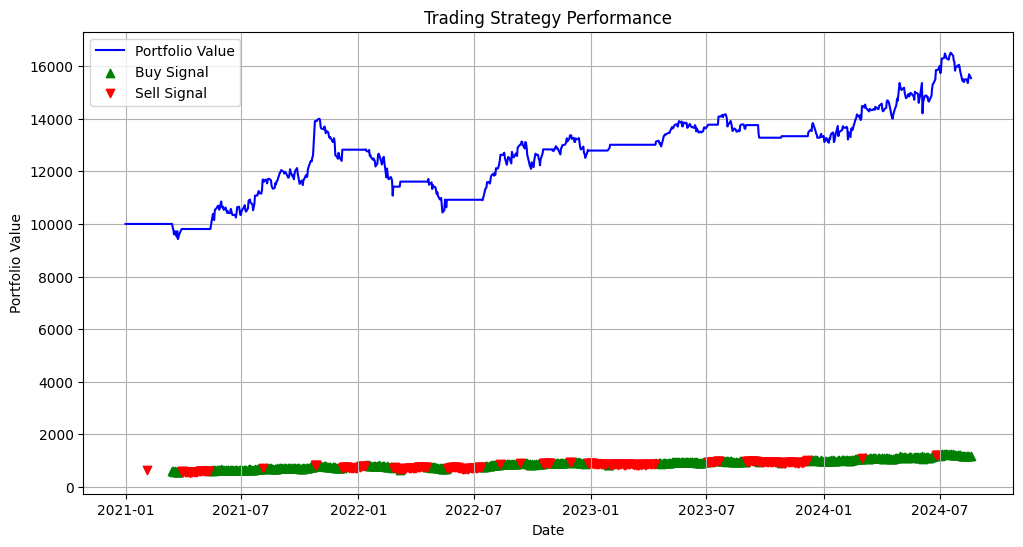

In [45]:
# Plot portfolio values
plt.figure(figsize=(12, 6))
plt.plot(data.index, portfolio_values, label='Portfolio Value', color='blue')

# Plot buy signals
plt.scatter(dates_buy, [data.loc[date, 'Close'] for date in dates_buy], marker='^', color='green', label='Buy Signal', alpha=1)

# Plot sell signals
plt.scatter(dates_sell, [data.loc[date, 'Close'] for date in dates_sell], marker='v', color='red', label='Sell Signal', alpha=1)
plt
plt.title('Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()